In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#if not specifies then indexing from 0
s=pd.Series([1,2,3,4])
s


0    1
1    2
2    3
3    4
dtype: int64

In [7]:
#using numpy data
n=np.array([1,2,3,4])
s=pd.Series(n)
s

0    1
1    2
2    3
3    4
dtype: int32

In [15]:
#explicit index
#s=pd.Series(np.random.randint(0,100,4),index=[2,3,4,5])
#s=pd.Series(np.random.randint(0,100,4),index=np.arange(1,5))
s=pd.Series(np.random.randint(0,100,4),index=['one','twi',3,4])
s

one    53
twi    25
3      22
4      19
dtype: int32

In [16]:
s.index
#index is a list


Index(['one', 'twi', 3, 4], dtype='object')

In [17]:
s=pd.Series(np.random.randint(0,100,4),index=[2,3,4,5])
s.index
#(notice the data types difference)

Int64Index([2, 3, 4, 5], dtype='int64')

In [6]:
s=pd.Series(np.random.randint(0,100,4),index=np.arange(1,5))
s

1    62
2    92
3    39
4    62
dtype: int32

In [21]:
#s.values returns a numpy array
s.values
s.count()#same as size in array

4

In [29]:
s=pd.Series([1,2,3,np.nan])
s.count()#3
len(s)#4
s.shape#(4,)
s.nunique()

3

In [28]:
#counting repetition of elements
s.value_counts()

3.0    1
2.0    1
1.0    1
dtype: int64

In [32]:
s=pd.Series([1,2,3,4])
s.apply(np.sqrt)#mainly for user defined functions
np.sqrt(s)#for universal functions

0    1.000000
1    1.414214
2    1.732051
3    2.000000
dtype: float64

In [34]:
#string related method
s=pd.Series(['A','b','Apple',np.nan,'cat'])
s.str.lower()
s.str.upper()

0        A
1        B
2    APPLE
3      NaN
4      CAT
dtype: object

In [36]:
#in Numpy
a1=np.array([3,4,5,6])
a2=np.array([6,7,8,9])
a1+a2

#in Pandas we need to have sma eindex
s1=pd.Series(a1,index=['one','two','three','four'])
s2=pd.Series(a2,index=[1,2,'three','four'])
s1+s2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5006: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return_indexers=True)


one       NaN
two       NaN
three    13.0
four     15.0
1         NaN
2         NaN
dtype: float64

In [37]:
s1=pd.Series(a1)
s2=pd.Series(a2)
s1+s2

0     9
1    11
2    13
3    15
dtype: int32

In [39]:
#Series multiplication/additpon by no
s1*10


0    3
1    4
2    5
3    6
dtype: int32

In [7]:
#
df=pd.DataFrame(np.random.randint(10,20,(4,4)))
df

,0,1,2,3
0,10,16,17,13
1,12,12,11,10
2,14,19,12,14
3,16,18,18,11


In [45]:
df=pd.DataFrame(data=np.random.randint(10,20,(3,3)),
                index=['one','two','three'],
                columns=['a','b','c']
               )
df=pd.DataFrame(data=np.random.randint(10,20,(3,3)),
                index=pd.date_range('2018-12-05',periods=3),
                columns=['a','b','c']
               )
df

,a,b,c
2018-12-05,15,17,17
2018-12-06,13,11,19
2018-12-07,17,16,14


In [44]:
pd.date_range('2018-12-05',periods=4)

DatetimeIndex(['2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08'], dtype='datetime64[ns]', freq='D')

In [48]:
df['b']#df.b
df['b'].dtype

dtype('int32')

In [49]:
df.dtypes

a    int32
b    int32
c    int32
dtype: object

In [59]:
#manipulating the index
df=pd.DataFrame(data=np.random.randint(10,20,(3,3)),
                index=['one','two','three'],
                columns=['a','b','c']
               )
#describe index
df.index
#checking a particular index
df.index[1]
#df.index[1]='four'#error
df.index.values[1]='four'
df.index=['peter','paul','pan']

In [61]:
df.index.values[df.index=='peter']='pp'

In [62]:
df.index

Index(['pp', 'paul', 'pan'], dtype='object')

In [63]:
df.values

array([[14, 15, 10],
       [14, 17, 13],
       [19, 13, 10]])

In [67]:
df.count(axis=0)

a    3
b    3
c    3
dtype: int64

In [8]:
s=pd.Series([1,2,3],name='Price')
s.index.name='period'

In [9]:
df=s.reset_index()

In [10]:
df

,period,Price
0,0,1
1,1,2
2,2,3


In [11]:
#converting index col to column
df=s.reset_index()
#converting a column into index
df.set_index('period')

,Price
period,
0,1
1,2
2,3


In [88]:
s=pd.Series(np.random.randint(10,20,5),
           index=np.arange(0,10,2))
s

0    19
2    19
4    14
6    12
8    13
dtype: int32

In [90]:
s.reindex([2,6,8])

2    19
6    12
8    13
dtype: int32

In [93]:
#the index not here will return value nan
s.reindex(np.arange(0,12))
#filling these nans by some value
s.reindex(np.arange(0,12),fill_value=20)
#filling by previous data
s.reindex(np.arange(0,12),method='ffill')

0     19
1     19
2     19
3     19
4     14
5     14
6     12
7     12
8     13
9     13
10    13
11    13
dtype: int32

In [102]:
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\'
#saving data to binary file
df=pd.DataFrame(data=np.random.randint(10,20,(3,3)),
                index=['one','two','three'],
                columns=['a','b','c']
               )
df.to_pickle(dir+'myFile.pkl')

#reading from pickled file
df1=pd.read_pickle(dir+'myFile.pkl')

In [103]:
df1

,a,b,c
one,11,18,11
two,19,13,19
three,14,15,14


In [115]:
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'
file=dir+'sales_figures_v3.xlsx'
df=pd.read_excel(file)

In [120]:
#opening another tab in the woeksheet
df=pd.read_excel(file,sheetname='report',
                 skiprows=1,
                 skipfooter=1)
df.drop('Unnamed: 0',axis=1)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [122]:
df

,Date,Sales Person,Sales Type,Amount
0,2011-01-10,Jones,Software,311569
1,2011-01-13,Jones,Hardware,568944
2,2011-01-20,Andrews,Hardware,789504
3,2011-01-28,Andrews,Software,255975
4,2011-01-03,Jones,Software,89005
5,2011-01-15,Jones,Hardware,103900
6,2011-01-02,Smith,Hardware,654300
7,2011-01-13,Smith,Software,145900
8,2011-01-14,Parker,Software,54900
9,2011-01-14,Parker,Hardware,99875


In [123]:
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'
file=dir+'data2Numpy.csv'
df=pd.read_csv(file,delimiter=',')
df

,a,b,c
0,98,100,86
1,24,23,99
2,1,41,17
3,84,34,2
4,43,-1,99


In [124]:
#assigning own header
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'
file=dir+'data2Numpy_noHeader.csv'
df=pd.read_csv(file,delimiter=',',header=None,
              names=['opn','cl','adj'])
df

,opn,cl,adj
0,98,100,86
1,24,23,99
2,1,41,17
3,84,34,2
4,43,-1,99


In [12]:
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'
file=dir+'problematicData.csv'
df=pd.read_csv(file,delimiter=',')
df

,a,b,c
0,98.0,100.0,86.0
1,24.0,NaN,99.0
2,NaN,41.0,17.0
3,84.0,34.0,NaN
4,43.0,-1.0,99.0


In [155]:
#df.fillna(0,inplace=True)
df.mean()

a    62.25
b    43.50
c    75.25
dtype: float64

In [127]:
df['a'].mean()

62.25

In [128]:
df.mean(axis=1)

a    62.25
b    43.50
c    75.25
dtype: float64

In [14]:
df.fillna(df.mean(axis=0))

,a,b,c
0,98.00,100.0,86.00
1,24.00,43.5,99.00
2,62.25,41.0,17.00
3,84.00,34.0,75.25
4,43.00,-1.0,99.00


In [135]:
df.replace(24,100)
df['a'].replace(np.nan,100)

0     98.0
1     24.0
2    100.0
3     84.0
4     43.0
Name: a, dtype: float64

In [136]:
#24 replced by 200 and 41 by 300
df.replace([24,41],[200,300])

,a,b,c
0,98.0,100.0,86.0
1,200.0,NaN,99.0
2,NaN,300.0,17.0
3,84.0,34.0,NaN
4,43.0,-1.0,99.0


In [139]:
subject=['excel','VBA','Python','word','PowerPoint','Access']
myCol=['A','C','D','B','E']
df=pd.DataFrame(np.random.randint(10,80,(6,5)),
               index=subject,
               columns=myCol)
df

,A,C,D,B,E
excel,77,35,18,56,51
VBA,35,69,36,27,69
Python,56,13,78,15,46
word,69,51,32,57,15
PowerPoint,27,21,17,52,59
Access,23,51,32,66,72


In [145]:
#df[['C','A','E']]
df['excel':'Python']#by rows or index we need to use : not the list
df[0:2]

,A,C,D,B,E
excel,77,35,18,56,51
VBA,35,69,36,27,69


In [146]:
df

,A,C,D,B,E
excel,77,35,18,56,51
VBA,35,69,36,27,69
Python,56,13,78,15,46
word,69,51,32,57,15
PowerPoint,27,21,17,52,59
Access,23,51,32,66,72


In [147]:
df.loc['excel':'PowerPoint':2,:]

,A,C,D,B,E
excel,77,35,18,56,51
Python,56,13,78,15,46
PowerPoint,27,21,17,52,59


In [149]:
df.loc[['Access','excel','PowerPoint'],:]

,A,C,D,B,E
Access,23,51,32,66,72
excel,77,35,18,56,51
PowerPoint,27,21,17,52,59


In [152]:
df.iloc[[2,5],:]

,A,C,D,B,E
Python,56,13,78,15,46
Access,23,51,32,66,72


In [173]:
subject=['Excel','PowerPoint','Autocad']
subject2=['Excel','Word','Autocad','Access']
order=pd.DataFrame([100,400,200],index=subject,
                  columns=['amount'])
order

,amount
Excel,100
PowerPoint,400
Autocad,200


In [174]:
margin=pd.DataFrame([50,30,43,44],
                   index=subject2,
                   columns=['profit'])
margin

,profit
Excel,50
Word,30
Autocad,43
Access,44


In [175]:
order.join(margin)
order.join(margin,how='left')

,amount,profit
Excel,100,50.0
PowerPoint,400,NaN
Autocad,200,43.0


In [176]:
margin1=margin.copy()
order1=order.copy()

In [177]:
order1=order1.reset_index()
margin1=margin1.reset_index()

In [169]:
order1.columns.values[0]='subject'
margin1.columns.values[0]='software'

In [178]:
pd.merge(order1,margin1)
#pd.merge(order1,margin1,left_on='subject',right_on='software')

,index,amount,profit
0,Excel,100,50
1,Autocad,200,43


In [180]:
order=order.reset_index()
margin=margin.reset_index()

In [182]:
margin

,index,profit
0,Excel,50
1,Word,30
2,Autocad,43
3,Access,44


In [183]:
pd.concat([order,margin])

,amount,index,profit
0,100.0,Excel,NaN
1,400.0,PowerPoint,NaN
2,200.0,Autocad,NaN
0,NaN,Excel,50.0
1,NaN,Word,30.0
2,NaN,Autocad,43.0
3,NaN,Access,44.0


In [184]:
pd.concat([order,margin],axis=1)

,index,amount,index,profit
0,Excel,100.0,Excel,50
1,PowerPoint,400.0,Word,30
2,Autocad,200.0,Autocad,43
3,NaN,NaN,Access,44


In [187]:
subject1=subject + ['Word']

In [189]:
myCol

['A', 'C', 'D', 'B', 'E']

In [192]:
df=pd.DataFrame(np.random.randint(10,50,(4,5)),
               index=subject1,
               columns=myCol)
df

,A,C,D,B,E
Excel,45,23,14,35,36
PowerPoint,12,24,47,30,47
Autocad,24,10,17,21,16
Word,41,19,14,46,35


In [194]:
df.sort_values('A',ascending=False)

,A,C,D,B,E
Excel,45,23,14,35,36
Word,41,19,14,46,35
Autocad,24,10,17,21,16
PowerPoint,12,24,47,30,47


In [196]:
df.sort_values(by=['A','C'],ascending=[False,True])

In [199]:
df.sort_values('Excel',axis=1)

,D,C,B,E,A
Excel,14,23,35,36,45
PowerPoint,47,24,30,47,12
Autocad,17,10,21,16,24
Word,14,19,46,35,41


In [201]:
df.sort_index(axis=1,ascending=False)

,E,D,C,B,A
Excel,36,14,23,35,45
PowerPoint,47,47,24,30,12
Autocad,16,17,10,21,24
Word,35,14,19,46,41


In [202]:
df.sort_index(axis=0,ascending=False)

,A,C,D,B,E
Word,41,19,14,46,35
PowerPoint,12,24,47,30,47
Excel,45,23,14,35,36
Autocad,24,10,17,21,16


In [205]:
df=pd.read_csv(dir+'sales_figures_v2.csv',usecols=['Month','Sales Person','Amount'])

In [207]:
df.head()

,Month,Sales Person,Amount
0,January,Jones,"$311,569.00"
1,January,Jones,"$568,944.00"
2,January,Andrews,"$789,504.00"
3,January,Andrews,"$255,975.00"
4,January,Jones,"$89,005.00"


In [219]:
df['Amount']=df['Amount'].replace('[\$,]', '',regex=True).astype(float)

In [220]:
df['Amount'].dtype

dtype('float64')

In [222]:
df.head(5)

,Month,Sales Person,Amount
0,January,Jones,311569.0
1,January,Jones,568944.0
2,January,Andrews,789504.0
3,January,Andrews,255975.0
4,January,Jones,89005.0


In [223]:
myGroup=df.groupby('Sales Person')
myGroup#its an object

In [ ]:
for i,j in myGroup:
    print(i)
    print(j)

In [228]:
type(i)

str

In [232]:
myGroup.mean()

pandas.core.frame.DataFrame

In [233]:
myGroup2=df.groupby(['Month','Sales Person'])

In [ ]:
for i,j in myGroup2:
    print(i)
    print(j)

In [242]:
monthSalesTotal=myGroup2.sum()
#this has multiple index
monthSalesTotal

Amount
Month     Sales Person           
April     Andrews        965519.0
          Jones         1001451.0
          Smith          790545.0
August    Andrews        262450.0
          Jones          283930.0
          Parker         135450.0
December  Baker          349500.0
          Jones          433689.0
          Smith          335900.0
February  Andrews       1629369.0
          Baker          560900.0
          Jones          290350.0
          Smith          133131.0
January   Andrews       1045479.0
          Baker          856004.0
          Jones         1073418.0
          Parker         269775.0
          Smith          800200.0
July      Baker          349500.0
          Jones          433689.0
          Smith          524440.0
June      Andrews        262450.0
          Parker         135450.0
March     Jones          720901.0
          Parker        1023075.0
          Smith         1677344.0
May       Parker         420825.0
          Smith          133131.0
November  Jones          283930.0
          Smith          364080.0
October   Smith          524440.0
September Smith          364080.0

In [241]:
monthSalesTotal.xs('April')

,Amount
Sales Person,
Andrews,965519.0
Jones,1001451.0
Smith,790545.0


In [243]:
monthSalesTotal.xs('Andrews',level='Sales Person')

,Amount
Month,
April,965519.0
August,262450.0
February,1629369.0
January,1045479.0
June,262450.0


In [248]:
monthSalesTotal.unstack()

Amount                                           
Sales Person    Andrews     Baker      Jones     Parker      Smith
Month                                                             
April          965519.0       NaN  1001451.0        NaN   790545.0
August         262450.0       NaN   283930.0   135450.0        NaN
December            NaN  349500.0   433689.0        NaN   335900.0
February      1629369.0  560900.0   290350.0        NaN   133131.0
January       1045479.0  856004.0  1073418.0   269775.0   800200.0
July                NaN  349500.0   433689.0        NaN   524440.0
June           262450.0       NaN        NaN   135450.0        NaN
March               NaN       NaN   720901.0  1023075.0  1677344.0
May                 NaN       NaN        NaN   420825.0   133131.0
November            NaN       NaN   283930.0        NaN   364080.0
October             NaN       NaN        NaN        NaN   524440.0
September           NaN       NaN        NaN        NaN   364080.0

In [245]:
monthSalesTotal

Amount
Month     Sales Person           
April     Andrews        965519.0
          Jones         1001451.0
          Smith          790545.0
August    Andrews        262450.0
          Jones          283930.0
          Parker         135450.0
December  Baker          349500.0
          Jones          433689.0
          Smith          335900.0
February  Andrews       1629369.0
          Baker          560900.0
          Jones          290350.0
          Smith          133131.0
January   Andrews       1045479.0
          Baker          856004.0
          Jones         1073418.0
          Parker         269775.0
          Smith          800200.0
July      Baker          349500.0
          Jones          433689.0
          Smith          524440.0
June      Andrews        262450.0
          Parker         135450.0
March     Jones          720901.0
          Parker        1023075.0
          Smith         1677344.0
May       Parker         420825.0
          Smith          133131.0
November  Jones          283930.0
          Smith          364080.0
October   Smith          524440.0
September Smith          364080.0

In [20]:
##aggregation
df = pd.DataFrame({'A': [1, 1, 2, 2],'B': [1, 2, 3, 4],
                   'C': np.random.randn(4)})
df

#The aggregation is for each column.
df.groupby('A').agg('min') # OR df.groupby('A').min()

#The multiple aggregation is for each column.
df.groupby('A').agg(['min','sum'])

#Aggregation for a particular column
df.groupby('A').B.agg(['min','sum'])

##different aggregation for diff columns

df.groupby('A').agg({'B':['min','max'],'C':'sum'})

##group by multiple columns
df.groupby(['A','B']).agg('min')

C
A B          
1 1 -0.108121
  2  0.720292
2 3  0.470928
  4 -1.473645

In [ ]:
#locals() to check all the variables created

In [35]:
pdate=pd.date_range('2018-12-1',periods=10)#default day
pdate#date series gernerated
pdate=pd.date_range('2018-12-1',periods=10,freq='M')#month end
pdate
pdate=pd.date_range('2018-12-1',periods=10,freq='MS') month start
pdate
pdate=pd.date_range('2018-12-1','2018-12-24',freq='D')#time series Day
pdate

pdate=pd.date_range('2018-12-10',periods=10,freq='2W-Mon')#time series every monday in the given time period
pdate

DatetimeIndex(['2018-12-10', '2018-12-24', '2019-01-07', '2019-01-21',
               '2019-02-04', '2019-02-18', '2019-03-04', '2019-03-18',
               '2019-04-01', '2019-04-15'],
              dtype='datetime64[ns]', freq='2W-MON')

In [45]:
#changing the date format
pdate=pd.date_range('2018-12-10','2019-06-01',freq='2W-Mon').strftime('%B-%d-%y')#%y for 2 letter year and %Y for 4 letter
pdate
#('%m-%d-%y')

array(['December-10-18', 'December-24-18', 'January-07-19',
       'January-21-19', 'February-04-19', 'February-18-19', 'March-04-19',
       'March-18-19', 'April-01-19', 'April-15-19', 'April-29-19',
       'May-13-19', 'May-27-19'], dtype='<U14')

In [47]:
dt=pd.to_datetime('15-12-2018')#here it has taken 15 as day automatically
dt
dt=pd.to_datetime('2018-12-15')
dt
dt=pd.to_datetime('20181215')
dt
dt=pd.to_datetime('7-8-2018',dayfirst=True)#its ambiguous thus dayfirst
dt

Timestamp('2018-08-07 00:00:00')

In [52]:
#interpreting any type of date format
dt=pd.to_datetime('12201809',format='%m%Y%d')
dt
#numpy datetime
dt1=np.datetime64('2018-12-04')
dt1
#it can be stored in pandas
dt2=pd.to_datetime(dt1)
dt2

Timestamp('2018-12-04 00:00:00')

In [55]:
#timestamp alternative to datetime
dt1=pd.Timestamp('2018-12-01')
dt1
dt1=pd.Timestamp(year=2017,month=12,day=31)
dt1

Timestamp('2017-12-31 00:00:00')

In [63]:
a = np.timedelta64(1, 'M')

In [64]:
#Adding delta time from numpy and date from pandas
dt1+a

Timestamp('2018-01-30 10:29:06')

In [59]:
dt3=np.datetime64('2018-12-01')

In [110]:
#Pivot table
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'
file=dir+'sales_figures_v2.csv'
df=pd.read_csv(file,delimiter=',')
df['Amount']=df['Amount'].replace('[\$,]', '',regex=True).astype(float)#removing $ sign and converting to float
df.head(5)

,Date,Month,Sales Person,ID,Region,State,Sales Type,Amount
0,10/1/2011,January,Jones,255-133,Southern,Texas,Software,311569.0
1,13/1/2011,January,Jones,255-133,Southern,Texas,Hardware,568944.0
2,20/1/2011,January,Andrews,255-253,Eastern,Florida,Hardware,789504.0
3,28/1/2011,January,Andrews,355-253,Eastern,Florida,Software,255975.0
4,3/1/2011,January,Jones,255-133,Southern,Arkansas,Software,89005.0


In [112]:
#same as unstack
myPivot=pd.pivot_table(df,index=['Month'],columns=['Sales Person'],values=['Amount'])
myPivot
myPivot=pd.pivot_table(df,index=['Month','Region'],columns=['Sales Person'],values=['Amount'])
myPivot
myPivot.xs('April')#for only april month
aa=myPivot.xs('Western',level='Region')#return type dataframe 

In [113]:
aa

Amount                                
Sales Person Andrews     Baker Jones    Parker Smith
Month                                               
August           NaN       NaN   NaN  135450.0   NaN
December         NaN  349500.0   NaN       NaN   NaN
February         NaN  560900.0   NaN       NaN   NaN
January          NaN  856004.0   NaN   89925.0   NaN
July             NaN  349500.0   NaN       NaN   NaN
June             NaN       NaN   NaN  135450.0   NaN
March            NaN       NaN   NaN  511537.5   NaN
May              NaN       NaN   NaN  140275.0   NaN

In [121]:
bb=aa['Amount']
bb['Baker']

Month
August           NaN
December    349500.0
February    560900.0
January     856004.0
July        349500.0
June             NaN
March            NaN
May              NaN
Name: Baker, dtype: float64

In [97]:
myPivot=pd.pivot_table(df,index=['Month','Region'],columns=['Sales Person'],values=['Amount'],fill_value=0)['baker']
myPivot.head(5)

Amount                                    
Sales Person      Andrews Baker     Jones    Parker     Smith
Month  Region                                                
April  Eastern   482759.5     0       0.0       0.0       0.0
       Southern       0.0     0  500725.5       0.0  790545.0
August Eastern   262450.0     0       0.0       0.0       0.0
       Southern       0.0     0  283930.0       0.0       0.0
       Western        0.0     0       0.0  135450.0       0.0

In [104]:
myPivot=pd.pivot_table(df,index=['Month','Region'],columns=['Sales Person'],values=['Amount'],aggfunc={'Amount':[np.sum,np.mean]})
myPivot.head(5)

Amount                                                      \
                     mean                                           sum         
Sales Person      Andrews Baker     Jones    Parker     Smith   Andrews Baker   
Month  Region                                                                   
April  Eastern   482759.5   NaN       NaN       NaN       NaN  965519.0   NaN   
       Southern       NaN   NaN  500725.5       NaN  790545.0       NaN   NaN   
August Eastern   262450.0   NaN       NaN       NaN       NaN  262450.0   NaN   
       Southern       NaN   NaN  283930.0       NaN       NaN       NaN   NaN   
       Western        NaN   NaN       NaN  135450.0       NaN       NaN   NaN   

                                                
                                                
Sales Person         Jones    Parker     Smith  
Month  Region                                   
April  Eastern         NaN       NaN       NaN  
       Southern  1001451.0       NaN  790545.0  
August Eastern         NaN       NaN       NaN  
       Southern   283930.0       NaN       NaN  
       Western         NaN  135450.0       NaN

In [106]:
#working with big files
#option1
dir2 ='C:\\Users\\Public\\Documents\\VN_MassAffluent\\Data\\'
reader=pd.read_csv(dir2 + 'mass_analytics_datamart_20180930.csv',chunksize=5,iterator=True)
df=next(reader)
print(df.head(2))
print('-----')
df=next(reader)
print(df.head(2))

   Unnamed: 0  business_date      cif           job_titile      income   age  \
0           1       20180930  1671298  Nhan Vien Van phong  44000000.0  40.0   
1           2       20180930   128052  Nhan Vien Van phong         NaN   NaN   

      province education  gender   region      ...       overdraft_balance  \
0       HA NOI       NaN  Female  VUNG 01      ...                     NaN   
1  HO CHI MINH       NaN  Female  VUNG 08      ...                     NaN   

   other_loan_indicator other_loan_balance  max_ovd_loan  \
0                   NaN                NaN             0   
1                   NaN                NaN             0   

   banca_exclude_credit_life_indicator banca_credit_life_indicator  \
0                                    0                           0   
1                                    0                           0   

  total_number_banca_life  total_number_banca_health_care  new_insurance  \
0                       0                               

In [ ]:
dir2 ='C:\\Users\\Public\\Documents\\VN_MassAffluent\\Data\\'
size=5000
reader=pd.read_csv(dir2 + 'mass_analytics_datamart_20180930.csv',chunksize=size,iterator=True)

totalno=1000

for i in range(totalno):
    myData=next(reader)
    if(i==0):
        result=myData
        print(myData.loc[:,['business_date','job_titile']].head(2))
        print('No of rows',result.shape[0])
    else:
        print(myData.loc[:,['business_date','job_titile']].head(2))
        result=result.append(myData)
        print('No of rows',result.shape[0])
        
        

In [ ]:
#option2 checking the memory


In [1]:
from sklearn import datasets

In [10]:
dir(datasets)
iris=datasets.load_iris()

In [11]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [ ]:
np.random.permutation()

In [14]:
type(iris)

sklearn.utils.Bunch

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
software=['excel','powerpoint','word']
software.append('apple')

In [36]:
software.insert(1,'samsung')

In [ ]:
software.sort()
software

In [37]:
software1=sorted(software)
software1

['apple', 'excel', 'powerpoint', 'samsung', 'word']

In [31]:
software1.sort(reverse=True)

In [40]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
list('python')#list will give diffr elements for the char

['p', 'y', 't', 'h', 'o', 'n']

In [47]:
'''myList=['apple','word','samsung','microsoft','google','autocad']
for i in myList:
    print(i)
    
print('statement after for loop')'''

s='python'
for i in s:
    print(i)

p
y
t
h
o
n


In [51]:
#creating dict
myDict={'student':'Peter','age':12}
myDict
myDict2=dict(student='William',
             age=13)
myDict2['student']='Mary'
myDict2
#retrieving

{'age': 13, 'student': 'Mary'}

In [55]:
myCLass=[myDict,myDict2]
myCLass
myCLass[1]['student']

'Mary'

In [58]:
for i in myDict2:
    #print(i)#return key of the dictionary
    print(i,'-->',myDict2[i])
    
##OR myDict2.items()

#to loop everything
for i,j in myDict2.items():
    print(i,'-->',j)

student --> Mary
age --> 13


In [57]:
for i in myDict2:
    s='abc'
    n=10
    print(s,n)
    print('-'*40)

abc 10
abc 10


In [63]:
myList=[0,1,2,3,4,5,6,7,8]
newList=[]
for i in myList:
    newList.append(i**2)
    
print(newList)
##OR
##list comprehension
newList=[ i**2 for i in myList]
print(newList)

[0, 1, 4, 9, 16, 25, 36, 49, 64]


In [71]:
newList=[ i for i in myList if i%2==0]
print(newList)

[0, 2, 4, 6, 8]


In [73]:
myTuple=(1,2,3,4)#immutable cannot change the data
myTuple
list1=list(myTuple)

In [75]:
tuple(list1)

(1, 2, 3, 4)

In [76]:
#user defined function
def odd2even(x):
    if x%2 > 0:
        x=x+1
    return x

In [78]:
odd2even(4)

4

In [79]:
s=pd.Series([1,2,3,4])

In [80]:
s.apply(odd2even)

0    2
1    2
2    4
3    4
dtype: int64

In [81]:
s.apply(lambda x: x+1)

0    2
1    3
2    4
3    5
dtype: int64

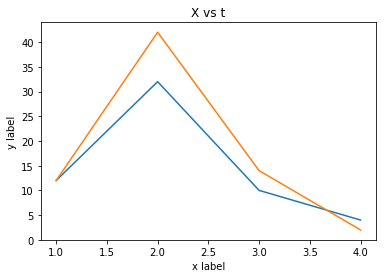

In [95]:
##Matplot lib
t=[1,2,3,4]
y=[12,32,10,4]
y1=[12,42,14,2]
plt.plot(t,y)
#plt.show()
plt.plot(t,y1)
#plt.show() after show iy will forget the object
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('X vs t')
plt.show()

(0, 20)

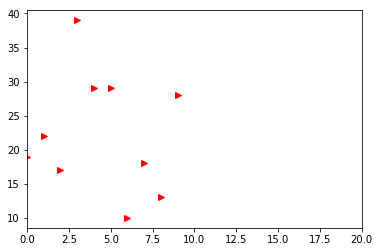

In [108]:
y1=np.random.randint(10,40,10)
x=np.arange(10)
plt.plot(x,y1,'r>')#'ro' for red dot
plt.xlim(0,20)
#plt.ylim(0,50)

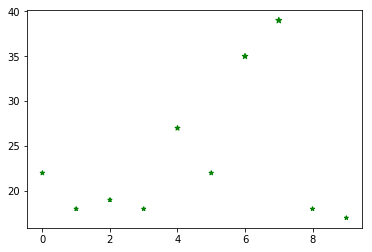

In [117]:
y1=np.random.randint(10,40,10)
x=np.arange(10)
plt.scatter(x,y1,marker='*',color='g',s=y1)

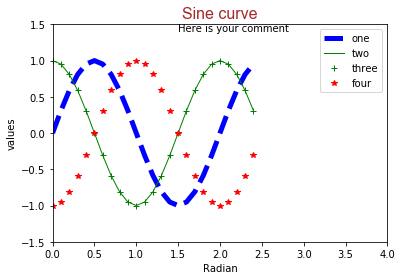

In [140]:
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'

t=np.arange(0,2.5,0.1)
y1=np.sin(np.pi*t)
y2=np.sin(np.pi*t+np.pi/2)
y3=np.sin(np.pi*t-np.pi/2)
plt.plot(t,y1,'b--',linewidth=5)
plt.plot(t,y2,'g',linewidth=1)
plt.plot(t,y2,'g+',linewidth=3)
plt.plot(t,y3,'r*',linewidth=3)
#OR
#plt.plot(t,y1,t,y2,t,y3)
plt.xlim(0,4)
plt.ylim(-1.5,1.5)
plt.xlabel('Radian')
plt.ylabel('values')
plt.title('Sine curve',fontname='Arial',
         fontsize=16,
         color='brown')
plt.legend(['one','two','three','four'],loc=1)
plt.text(1.5,1.4,'Here is your comment')
plt.savefig(dir+'plot.pdf')
plt.show()


In [143]:
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'
df=pd.read_csv(dir+'data2Numpy.csv')
df.head(5)

,a,b,c
0,98,100,86
1,24,23,99
2,1,41,17
3,84,34,2
4,43,-1,99


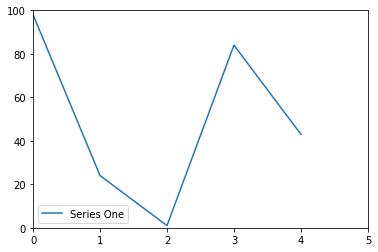

In [146]:
plt.axis([0,5,0,100])#axis for x and y x from 0 to 5 and y from 0 to 100
plt.plot(df['a'])
plt.legend(['Series One'],loc=3)

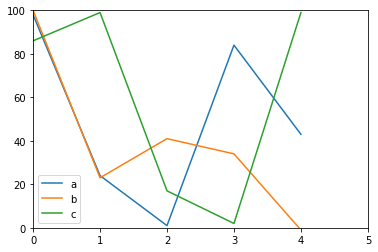

In [147]:
plt.axis([0,5,0,100])
plt.plot(df)
plt.legend(df.columns,loc=3)

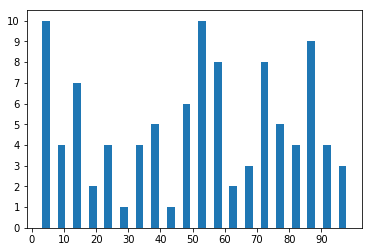

In [153]:
pop=np.random.randint(0,100,100)
plt.hist(pop,bins=20,rwidth=0.5)
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(11))
plt.show()

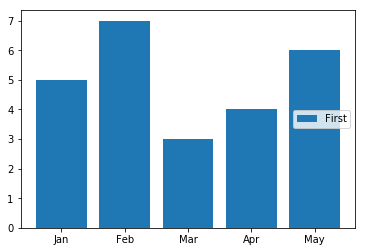

In [159]:
index=np.arange(5)
values=[5,7,3,4,6]
plt.bar(index,values,label='First')
plt.legend(loc=5)
plt.xticks(np.arange(5),['Jan','Feb','Mar','Apr','May'])
plt.show()

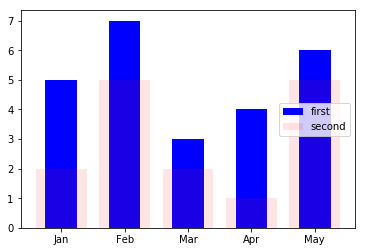

In [164]:
index=np.arange(5)
values=[5,7,3,4,6]
values2=[2,5,2,1,5]
plt.bar(index,values,width=0.5,label='first',color='blue')
plt.bar(index,values2,label='second',color='red',alpha=0.1)#alpha for transparency
plt.legend(loc=5)
plt.xticks(np.arange(5),['Jan','Feb','Mar','Apr','May'])
plt.show()

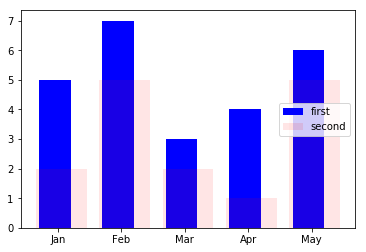

In [167]:
index=np.arange(5)
values=[5,7,3,4,6]
values2=[2,5,2,1,5]
plt.bar(index-0.05,values,width=0.5,label='first',color='blue')
plt.bar(index+0.05,values2,label='second',color='red',alpha=0.1)#alpha for transparency
plt.legend(loc=5)
plt.xticks(np.arange(5),['Jan','Feb','Mar','Apr','May'])
plt.show()

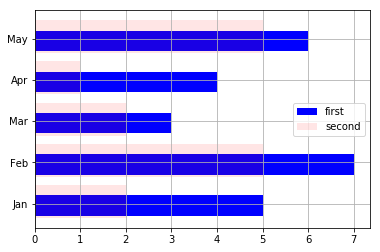

In [170]:
index=np.arange(5)
values=[5,7,3,4,6]
values2=[2,5,2,1,5]
plt.barh(index-0.05,values,height=0.5,label='first',color='blue')
plt.barh(index+0.05,values2,label='second',color='red',alpha=0.1)#alpha for transparency
plt.legend(loc=5)
plt.yticks(np.arange(5),['Jan','Feb','Mar','Apr','May'])
plt.grid(True)
plt.show()

In [171]:
#using pandas for plot which is built on atplotlib
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'
df=pd.read_csv(dir+'data2Numpy.csv')
df.head(5)

,a,b,c
0,98,100,86
1,24,23,99
2,1,41,17
3,84,34,2
4,43,-1,99


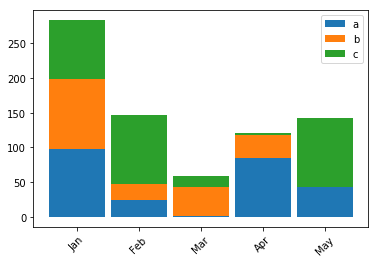

In [174]:
df.index=['Jan','Feb','Mar','Apr','May']
df.plot(kind='bar',width=0.9,use_index=True,stacked=True,rot=45)
plt.show()

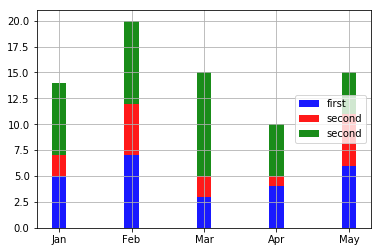

In [176]:
index=np.arange(5)
values=np.array([5,7,3,4,6])
values2=np.array([2,5,2,1,5])
values3=np.array([7,8,10,5,4])
plt.bar(index,values,width=0.2,label='first',color='blue',alpha=0.9)
plt.bar(index,values2,width=0.2,label='second',color='red',alpha=0.9,bottom=values)#alpha for transparency
plt.bar(index,values3,width=0.2,label='second',color='green',alpha=0.9,bottom=values+values2)
plt.legend(loc=5)
plt.grid(True)
plt.xticks(np.arange(5),['Jan','Feb','Mar','Apr','May'])
plt.show()
#Stacked is used in pandas and bottom in matplot lib 

(-1.1102300260805227,
 1.113231726966045,
 -1.1139915429274783,
 1.1094702101190894)

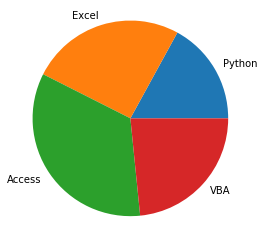

In [181]:
courses=['Python','Excel','Access','VBA']
scores=[40,60,80,55]
mycolor=['yellow','red','green','blue']
plt.pie(scores,labels=courses)
plt.axis('square')

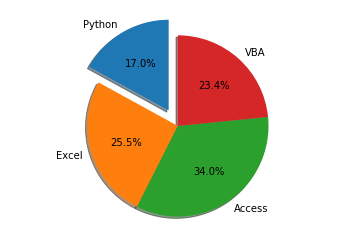

In [184]:
plt.pie(scores,labels=courses,
       explode=[0.2,0,0,0],
       autopct='%1.1f%%',startangle=90,shadow=True)
plt.axis('equal')
plt.show()

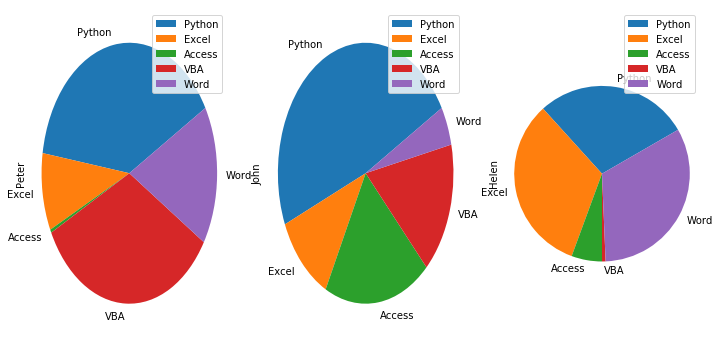

In [195]:
dir='D:\\Users\\hacma0b\\Documents\\Juhi_doc\\Training and Material\\Practice\\PythonTraining\\samplesFiles - AIA\\samplesFiles - AIA\\'
df=pd.read_csv(dir+'data2Numpy.csv')
df.head(5)
df.index=['Python','Excel','Access','VBA','Word']
df.columns=['Peter','John','Helen']
df=df.replace(-1,10)
df.plot(kind='pie',figsize=(12,6),startangle=30,subplots=True)
plt.axis('equal')
plt.show()

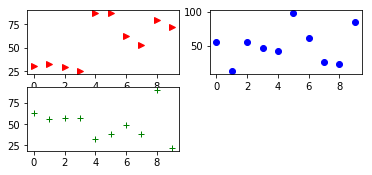

In [197]:
y=np.random.randint(10,100,(10,4))
#Set1
plt.subplot(3,1,1)
plt.plot(y[:,0],'r>')

plt.subplot(3,1,2)
plt.plot(y[:,1],'bo')
plt.subplot(3,1,3)
plt.plot(y[:,2],'g+')

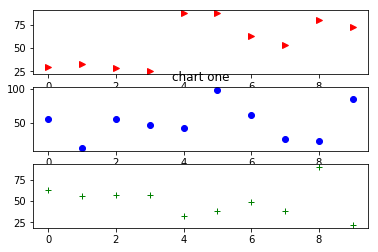

In [200]:
#Set2
plt.subplot(3,1,1)
plt.plot(y[:,0],'r>')
plt.title('chart one')

plt.subplot(3,1,2)
plt.plot(y[:,1],'bo')


plt.subplot(3,1,3)
plt.plot(y[:,2],'g+')

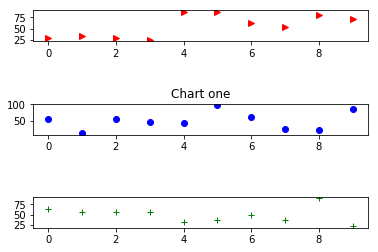

In [216]:
#Set3
ax1=plt.subplot(3,1,1)
plt.plot(y[:,0],'r>')
#plt.title('chart one')

ax2=plt.subplot(3,1,2)
plt.plot(y[:,1],'bo')


ax3=plt.subplot(3,1,3)
plt.plot(y[:,2],'g+')

plt.sca(ax2)#sca=set current axis

plt.title('Chart one')
plt.subplots_adjust(hspace=2)
plt.show()

In [ ]:
#set4,5,6
fig=plt.figure(figsize=(12,5),facecolor='silver')


ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312,facecolor='silver')
ax3=fig.add_subplot(313)

fig.subplots_adjust(hspace=1)

ax1.plot(y[:,0],'r>')
ax1.set_title('Chart')
ax2.plot(y[:,1],'bo')
ax3.plot(y[:,2],'g+')

plt.show()

In [ ]:
fig=plt.figure(figsize=(12,5),facecolor='silver')
fig.subplots_adjust(hspace=1)

ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312,facecolor='silver')
ax3=fig.add_subplot(313)



ax1=plt.subplot(3,1,1)
plt.plot(y[:,0],'r>')
#plt.title('chart one')

ax2=plt.subplot(3,1,2)
plt.plot(y[:,1],'bo')


ax3=plt.subplot(3,1,3)
plt.plot(y[:,2],'g+')

plt.sca(ax2)#sca=set current axis

plt.title('Chart one')
plt.subplots_adjust(hspace=2)
plt.show()

In [11]:
df = pd.DataFrame({'A': [1, 1, 2, 2],'B': [1, 2, 3, 4],
                   'C': [2,3,4,5]})
df



A
1    1
2    3
Name: B, dtype: int64

In [19]:
a=df['A']==1
df[a]

,A,B,C
0,1,1,1.308658
1,1,2,0.196790
